# Dubinska analiza podataka - projektni zadatak

## 1. Predprocesiranje podataka

In [1]:
phoneData <- read.csv('train.csv')

str(phoneData)

'data.frame':	2000 obs. of  21 variables:
 $ battery_power: int  842 1021 563 615 1821 1859 1821 1954 1445 509 ...
 $ blue         : int  0 1 1 1 1 0 0 0 1 1 ...
 $ clock_speed  : num  2.2 0.5 0.5 2.5 1.2 0.5 1.7 0.5 0.5 0.6 ...
 $ dual_sim     : int  0 1 1 0 0 1 0 1 0 1 ...
 $ fc           : int  1 0 2 0 13 3 4 0 0 2 ...
 $ four_g       : int  0 1 1 0 1 0 1 0 0 1 ...
 $ int_memory   : int  7 53 41 10 44 22 10 24 53 9 ...
 $ m_dep        : num  0.6 0.7 0.9 0.8 0.6 0.7 0.8 0.8 0.7 0.1 ...
 $ mobile_wt    : int  188 136 145 131 141 164 139 187 174 93 ...
 $ n_cores      : int  2 3 5 6 2 1 8 4 7 5 ...
 $ pc           : int  2 6 6 9 14 7 10 0 14 15 ...
 $ px_height    : int  20 905 1263 1216 1208 1004 381 512 386 1137 ...
 $ px_width     : int  756 1988 1716 1786 1212 1654 1018 1149 836 1224 ...
 $ ram          : int  2549 2631 2603 2769 1411 1067 3220 700 1099 513 ...
 $ sc_h         : int  9 17 11 16 8 17 13 16 17 19 ...
 $ sc_w         : int  7 3 2 8 2 1 8 3 1 10 ...
 $ talk_time    : i

In [2]:
library(tidyr)
library(dplyr)

phoneData <- phoneData %>%
    mutate(across(c(1,3,5,7:17), scale))


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [7]:
phoneData$price_range <- as.factor(phoneData$price_range)

## 2. Klasifikacija - umjetne neuronske mreže

#### Na ovom datasetu radi dobro, točnost 95%

In [14]:
library(neuralnet)
library(caret)

indeksi = createDataPartition(phoneData$price_range, p = 0.8, list = FALSE)
skup_tren <- phoneData[indeksi, ]
skup_test <- phoneData[-indeksi, ] 

nn = neuralnet(price_range ~ .,
                data = skup_tren,
                hidden = 15,
                lifesign = 'full',
                linear.output = FALSE,
                stepmax = 100000)

hidden: 15    thresh: 0.01    rep: 1/1    steps: 
    521
	error: 0.02259
	time: 4.1 secs



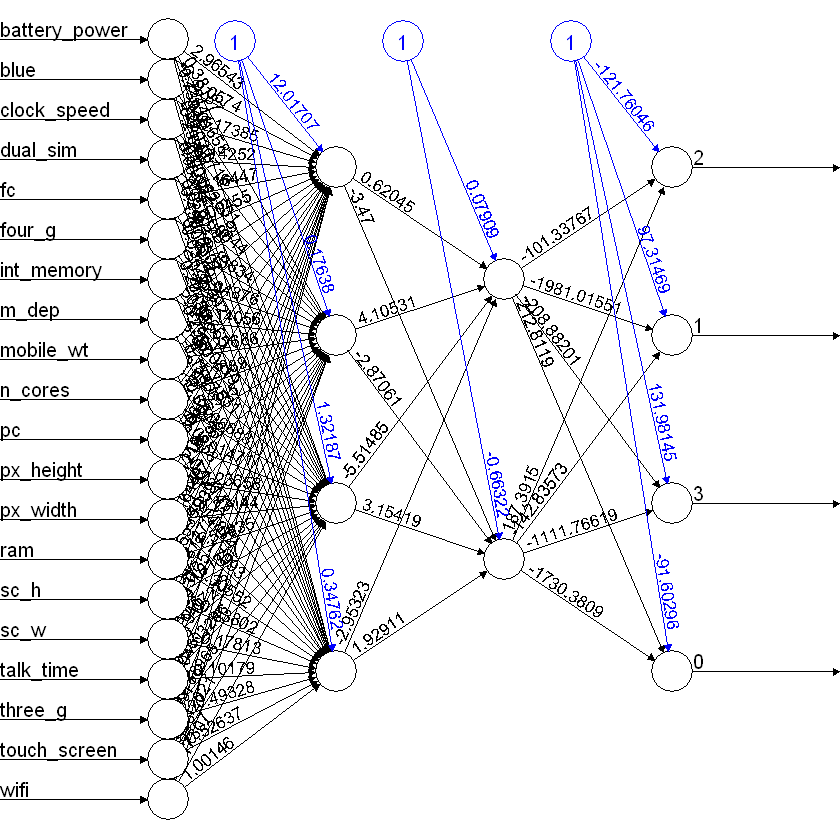

In [9]:
plot(nn, rep=1)

In [22]:
predikcije <- neuralnet::compute(nn, rep = 1, skup_test[, -21])

yhat <- predikcije$net.result

print(yhat)

yhat <- data.frame("yhat"=ifelse(max.col(yhat[ ,1:4])==1, "0",
                          ifelse(max.col(yhat[ ,1:4])==2, "1",
                          ifelse(max.col(yhat[ ,1:4])==3, "2", "3"))))

print(yhat)

             [,1]         [,2]         [,3]         [,4]
8    4.730928e-01 4.447973e-01 1.824310e-19 3.936114e-63
17   9.748130e-61 8.149598e-27 2.536090e-06 9.999988e-01
26   6.370194e-40 1.375561e-14 9.999990e-01 8.585345e-09
34   9.572815e-62 1.212657e-27 3.571152e-12 1.000000e+00
35   1.000000e+00 5.591233e-09 3.332966e-24 1.700347e-61
39   4.089243e-45 2.813218e-09 1.000000e+00 5.724288e-13
50   1.907018e-56 5.976471e-30 1.154840e-04 9.999999e-01
63   1.000000e+00 2.331185e-06 3.136740e-24 2.513385e-64
69   9.993174e-01 1.051826e-02 3.404934e-23 2.141256e-62
73   1.000000e+00 1.039160e-10 1.870948e-21 1.241002e-67
76   5.094121e-06 9.996994e-01 4.948241e-11 2.745652e-47
86   4.448517e-01 5.641401e-01 5.194389e-14 3.427512e-44
87   1.000000e+00 2.130242e-08 2.220884e-23 3.074828e-62
89   5.151136e-40 2.527292e-07 9.999984e-01 5.488334e-16
97   1.000000e+00 2.785506e-07 2.911947e-20 1.175645e-61
102  1.817378e-11 9.999999e-01 1.691930e-09 1.005971e-40
108  2.373505e-56 2.797335e-28 

In [23]:
cm <- confusionMatrix(as.factor(skup_test$price_range), as.factor(yhat$yhat))
 
print(cm)

Confusion Matrix and Statistics

          Reference
Prediction  0  1  2  3
         0 96  4  0  0
         1  2 94  4  0
         2  0  2 95  3
         3  0  0  5 95

Overall Statistics
                                          
               Accuracy : 0.95            
                 95% CI : (0.9238, 0.9692)
    No Information Rate : 0.26            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9333          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity            0.9796    0.940   0.9135   0.9694
Specificity            0.9868    0.980   0.9831   0.9834
Pos Pred Value         0.9600    0.940   0.9500   0.9500
Neg Pred Value         0.9933    0.980   0.9700   0.9900
Prevalence             0.2450    0.250   0.2600   0.2450
Detection Rate         0.2400    0.235   0.2375   0.2375
Det

## 3. Ansambli - slučajne šume

## 4. Asocijacijska analiza - učenje asocijacijskih pravila

## 5. Grupiranje k-sredina